In [12]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import fiona
from warnings import filterwarnings
filterwarnings("ignore")

In [13]:
link_raster = r'data\Raster\NE1_50M_SR_W.tif'
link_shp = r'data\202303_OSM2IGEO_MAROC_SHP_WGS84_4326\H_OSM_ADMINISTRATIF\REGION.shp'

In [14]:
gdf = gpd.read_file(link_shp)
gdf.head(3)

,ID,NOM,SOURCE,DATE_MAJ,geometry
0,r1154756,Ceuta,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((-5.41848 35.91223, -5.41885 35..."
1,r1154757,Melilla,OpenStreetMap,2022-12-01,"POLYGON ((-2.95205 35.32015, -2.95202 35.32011..."
2,r1592819,Tanger-Tétouan-Al Hoceïma,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((-5.91729 35.79625, -5.91727 35..."


In [15]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        15 non-null     object  
 1   NOM       15 non-null     object  
 2   SOURCE    15 non-null     object  
 3   DATE_MAJ  15 non-null     object  
 4   geometry  15 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 728.0+ bytes


In [16]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

let's try to calculate the surface of each community respresented in the sahpefile:

In [17]:
from shapely.geometry import shape
shapes_geom=list()
with fiona.open(link_shp,'r') as shapefile:
    for feature in shapefile :
        shapes_geom.append(shape(feature['geometry']))


In [18]:
gdf['area_in_deg²'] = gdf['geometry'].area
gdf['perimeter_in_deg'] = gdf['geometry'].length
gdf #are and permeter are expressed in degree squared (not too util for a realword measure !! )

,ID,NOM,SOURCE,DATE_MAJ,geometry,area_in_deg²,perimeter_in_deg
0,r1154756,Ceuta,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((-5.41848 35.91223, -5.41885 35...",0.001969,0.429200
1,r1154757,Melilla,OpenStreetMap,2022-12-01,"POLYGON ((-2.95205 35.32015, -2.95202 35.32011...",0.001345,0.247758
2,r1592819,Tanger-Tétouan-Al Hoceïma,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((-5.91729 35.79625, -5.91727 35...",1.599141,8.408838
3,r1719443,Oriental,OpenStreetMap,2021-07-23,"MULTIPOLYGON (((-2.92547 35.25446, -2.92537 35...",6.418567,19.381737
4,r2424034,Drâa-Tafilalet,OpenStreetMap,2022-05-04,"POLYGON ((-4.27908 30.54187, -4.29634 30.53631...",8.154770,18.183222
5,r2424036,Souss-Massa,OpenStreetMap,2022-12-12,"MULTIPOLYGON (((-9.62755 30.26655, -9.62743 30...",5.022205,15.291121
6,r2424040,Guelmim-Oued Noun,OpenStreetMap,2023-01-06,"POLYGON ((-8.73925 27.14505, -8.75422 27.14715...",4.109154,10.747425
7,r2424085,Casablanca-Settat,OpenStreetMap,2022-05-04,"MULTIPOLYGON (((-8.75473 32.97784, -8.75452 32...",1.958152,8.885022
8,r2424086,Marrakech-Safi,OpenStreetMap,2022-05-04,"MULTIPOLYGON (((-9.76498 31.52196, -9.76489 31...",3.710001,10.945446
9,r2424260,Laâyoune-Sakia El Hamra,OpenStreetMap,2022-09-06,"POLYGON ((-8.6669 26.73991, -8.66688 26.72944,...",13.031348,18.533581


In [19]:
# Project data in UTM 33°N
gdf = gdf.to_crs(epsg=32630)
gdf['AREA in KM²'] = round((gdf['geometry'].area)/(1000000),2)
gdf['PERIMETER in KM'] = round((gdf['geometry'].length)/(1000),2)
gdf

,ID,NOM,SOURCE,DATE_MAJ,geometry,area_in_deg²,perimeter_in_deg,AREA in KM²,PERIMETER in KM
0,r1154756,Ceuta,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((281766.602 3976915.731, 281732...",0.001969,0.429200,19.73,42.15
1,r1154757,Melilla,OpenStreetMap,2022-12-01,"POLYGON ((504358.579 3908548.143, 504361.263 3...",0.001345,0.247758,13.56,24.95
2,r1592819,Tanger-Tétouan-Al Hoceïma,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((236360.509 3965278.128, 236362...",1.599141,8.408838,16170.47,837.31
3,r1719443,Oriental,OpenStreetMap,2021-07-23,"MULTIPOLYGON (((506780.056 3901265.16, 506789....",6.418567,19.381737,66081.91,1944.91
4,r2424034,Drâa-Tafilalet,OpenStreetMap,2022-05-04,"POLYGON ((377306.064 3379527.441, 375643.88 33...",8.154770,18.183222,86218.86,1854.39
5,r2424036,Souss-Massa,OpenStreetMap,2022-12-12,"MULTIPOLYGON (((-138200.715 3366978.007, -1381...",5.022205,15.291121,54075.93,1582.96
6,r2424040,Guelmim-Oued Noun,OpenStreetMap,2023-01-06,"POLYGON ((-69247.632 3015536.942, -70724.87 30...",4.109154,10.747425,45133.64,1122.34
7,r2424085,Casablanca-Settat,OpenStreetMap,2022-05-04,"MULTIPOLYGON (((-38088.067 3663569.511, -38063...",1.958152,8.885022,20378.56,903.33
8,r2424086,Marrakech-Safi,OpenStreetMap,2022-05-04,"MULTIPOLYGON (((-142962.731 3507352.581, -1429...",3.710001,10.945446,39227.02,1122.76
9,r2424260,Laâyoune-Sakia El Hamra,OpenStreetMap,2022-09-06,"POLYGON ((-64081.139 2970207.124, -64131.345 2...",13.031348,18.533581,147049.11,1946.21


In [20]:
gdf.crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Let's plot our shapefile with a focus on "NOM" variable :

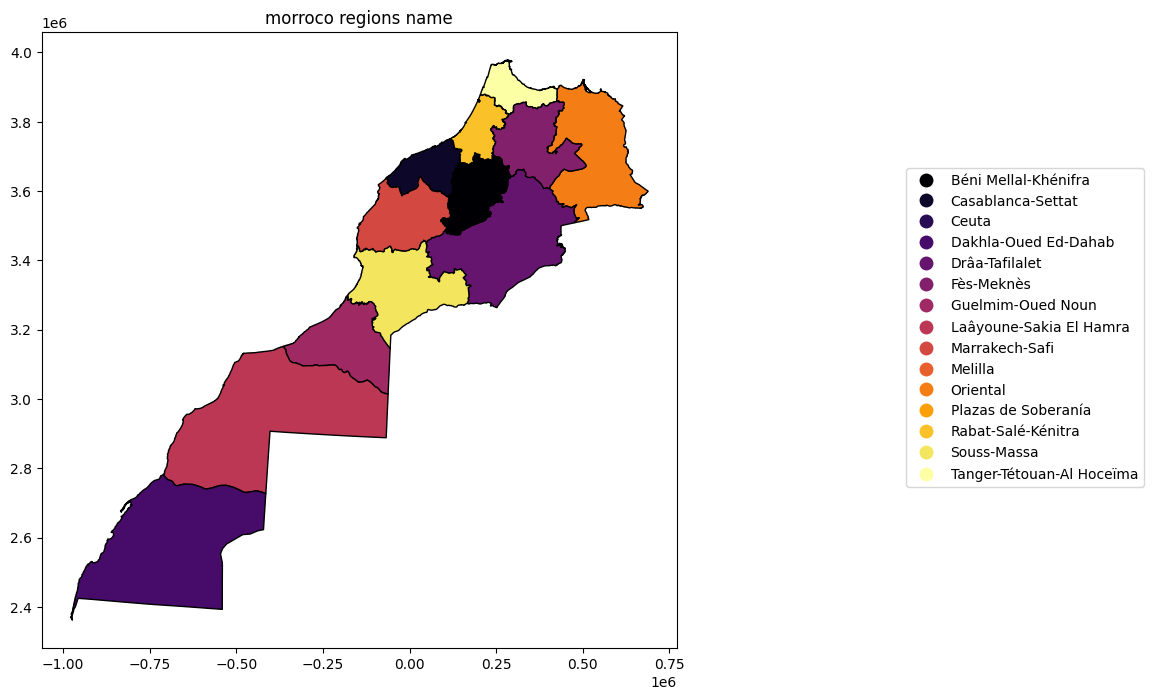

In [21]:
fig,ax = plt.subplots(figsize = (10, 8))
gdf.plot(ax=ax, column="NOM", cmap = "inferno", legend = True, edgecolor='black', legend_kwds = {"loc": "lower left", "bbox_to_anchor": (1.35, 0.25)})
plt.title("morroco regions name")
plt.show()

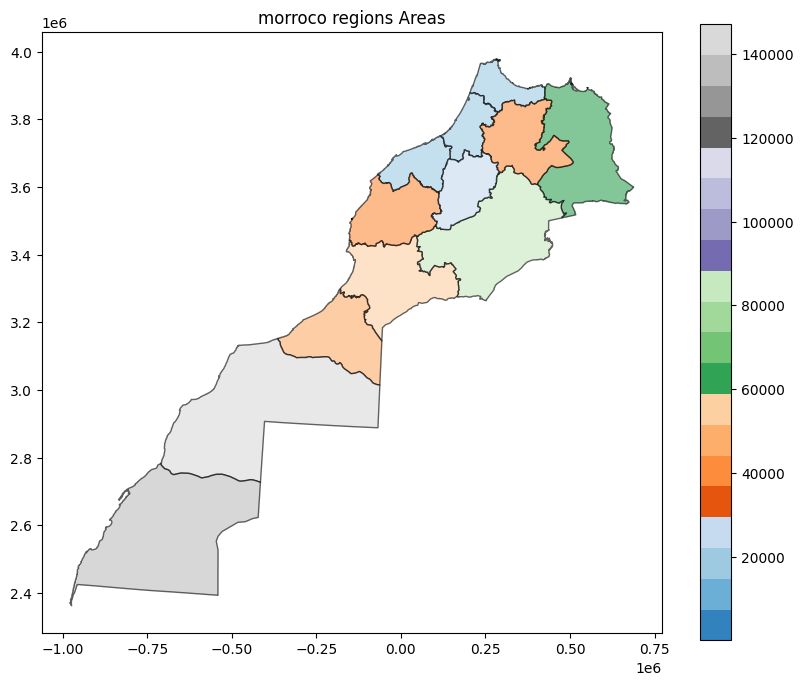

In [22]:
fig,ax = plt.subplots(figsize = (10, 8))
gdf.plot(ax=ax, column="AREA in KM²", cmap="tab20c", legend=True, alpha=0.6, edgecolor='black')
plt.title("morroco regions Areas")
plt.show()

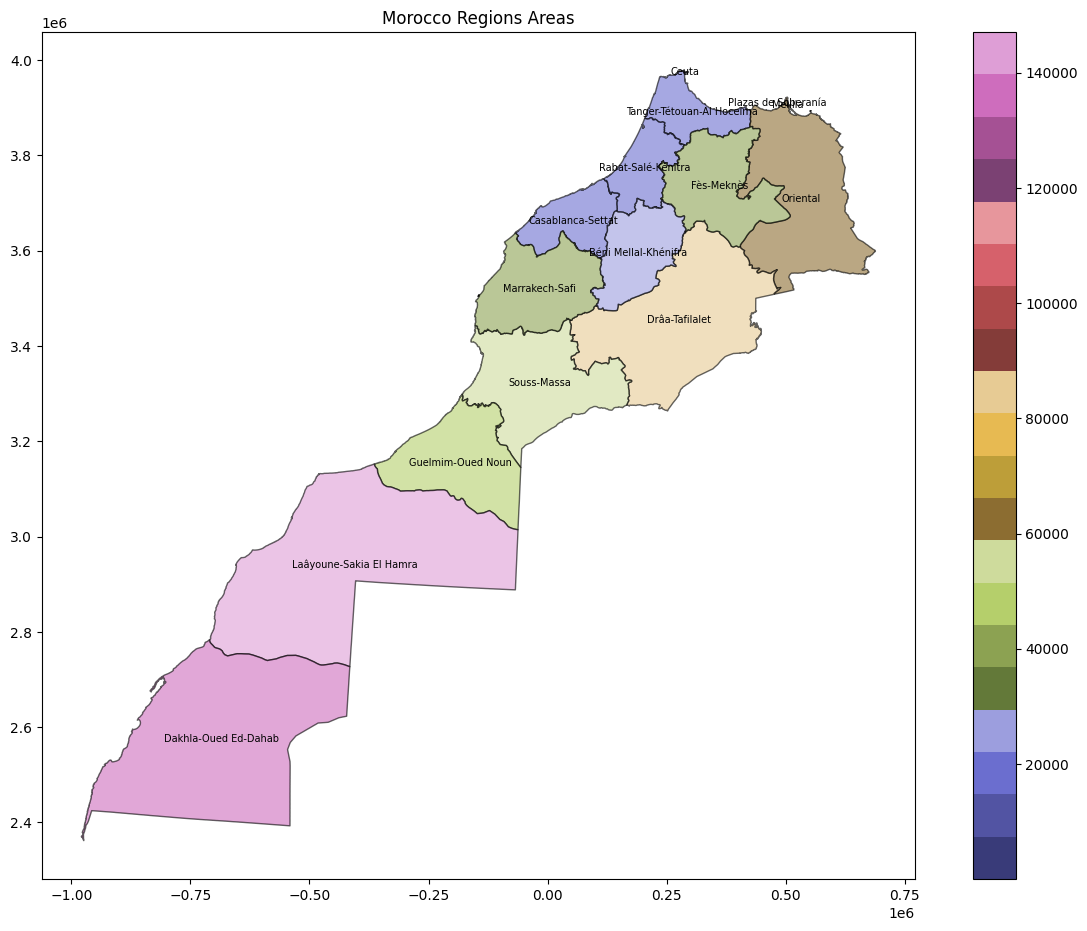

In [23]:
fig,ax = plt.subplots(figsize = (15, 11))
gdf.plot(ax=ax, column="AREA in KM²", cmap="tab20b", legend=True, alpha=0.6, edgecolor='black')
# Ajouter les noms des communes au centre de chaque polygone
for idx, row in gdf.iterrows():
    # Calculer les coordonnées du centre de chaque géométrie
    x, y = row['geometry'].centroid.xy #retourne les coordonées du centroid de la geometrie x=[] et y=[]
    # Ajouter le texte au centre
    ax.text(x[0], y[0], row['NOM'], fontsize=7, ha='center', va='center', color='black',fontfamily='sans-serif')

# Ajouter un titre
plt.title("Morocco Regions Areas")

# Afficher le graphique
plt.show()

In [24]:
gdf.loc[gdf["AREA in KM²"].idxmax()]

ID                                                           r2424260
NOM                                           Laâyoune-Sakia El Hamra
SOURCE                                                  OpenStreetMap
DATE_MAJ                                                   2022-09-06
geometry            POLYGON ((-64081.13899148244 2970207.123810203...
area_in_deg²                                                13.031348
perimeter_in_deg                                            18.533581
AREA in KM²                                                 147049.11
PERIMETER in KM                                               1946.21
Name: 9, dtype: object

In [25]:
gdf.loc[gdf["AREA in KM²"].idxmin()]

ID                                                           r5921806
NOM                                               Plazas de Soberanía
SOURCE                                                  OpenStreetMap
DATE_MAJ                                                   2022-12-02
geometry            MULTIPOLYGON (((418123.3454883988 3897481.9883...
area_in_deg²                                                 0.000073
perimeter_in_deg                                             0.132913
AREA in KM²                                                      0.74
PERIMETER in KM                                                  13.2
Name: 14, dtype: object

it's preferable to separate the plots so every plot will  be relevant and meaningful 

Let's bring a ratser worldmap image :

In [26]:
from pprint import pprint
with rasterio.open(link_raster) as src:
    pprint(src.meta)
    print ("RASTER CRS IS : ",src.crs)

{'count': 3,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 5400,
 'nodata': None,
 'transform': Affine(0.03333333333333, 0.0, -179.99999999999997,
       0.0, -0.03333333333333, 90.0),
 'width': 10800}
RASTER CRS IS :  EPSG:4326


In [27]:
raster_file = rasterio.open(link_raster)
raster_mtx = raster_file.read()
print(raster_mtx)

[[[124 124 124 ... 124 124 124]
  [118 118 118 ... 118 118 118]
  [118 118 118 ... 118 118 118]
  ...
  [242 241 241 ... 242 241 242]
  [243 243 243 ... 242 243 243]
  [245 245 244 ... 244 245 244]]

 [[173 173 173 ... 173 173 173]
  [169 169 169 ... 169 169 169]
  [169 169 169 ... 169 169 169]
  ...
  [244 244 243 ... 244 243 244]
  [245 244 244 ... 244 244 245]
  [246 245 245 ... 245 246 245]]

 [[205 205 205 ... 207 206 205]
  [203 203 203 ... 205 204 203]
  [204 204 204 ... 204 204 204]
  ...
  [247 247 247 ... 247 247 247]
  [248 247 247 ... 247 247 248]
  [249 248 248 ... 248 248 248]]]


In [28]:
raster_mtx.shape #image with 3 bands (RGB)

(3, 5400, 10800)

In [29]:
raster_mtx.min(), raster_mtx.max()

(62, 255)

### Now we just made sure that we have the save CRS in the Rasterfile and shapefile, we can start doing some zonal stats :

In [30]:
stats = zonal_stats(link_shp, link_raster, stats = "count min max mean")
stats

[{'min': 233.0, 'max': 233.0, 'mean': 233.0, 'count': 1},
 {'min': 160.0, 'max': 214.0, 'mean': 187.0, 'count': 2},
 {'min': 128.0, 'max': 248.0, 'mean': 218.08952116585704, 'count': 1441},
 {'min': 135.0, 'max': 251.0, 'mean': 231.9404741304724, 'count': 5779},
 {'min': 110.0, 'max': 248.0, 'mean': 215.2470684483229, 'count': 7334},
 {'min': 124.0, 'max': 249.0, 'mean': 218.04442970822282, 'count': 4524},
 {'min': 130.0, 'max': 250.0, 'mean': 233.59832296456585, 'count': 3697},
 {'min': 157.0, 'max': 246.0, 'mean': 235.3014164305949, 'count': 1765},
 {'min': 125.0, 'max': 250.0, 'mean': 233.45285842562106, 'count': 3341},
 {'min': 128.0, 'max': 254.0, 'mean': 240.7844908393694, 'count': 11735},
 {'min': 127.0, 'max': 253.0, 'mean': 243.30196078431374, 'count': 10200},
 {'min': 177.0, 'max': 247.0, 'mean': 233.57096774193548, 'count': 1550},
 {'min': 138.0, 'max': 249.0, 'mean': 226.05049911920142, 'count': 3406},
 {'min': 143.0, 'max': 246.0, 'mean': 227.16192468619246, 'count': 2390}

In [31]:
import numpy as np

# Définir la constante pour la conversion en mètres carrés
x_pixel_size = 0.03333333333333
y_pixel_size = 0.03333333333333

# Latitude approximative (pour la conversion en mètres)
latitude = 45

# Conversion des degrés en mètres
distance_latitude = y_pixel_size * 111320  # Distance d'un degré de latitude en mètres
distance_longitude = x_pixel_size * 111320 * np.cos(np.radians(latitude))  # Distance d'un degré de longitude en mètres

# Aire du pixel en mètres carrés
pixel_area = distance_latitude * distance_longitude

# Initialiser une liste pour les aires en kilomètres carrés
areas_in_skm = []

# Calculer les aires pour chaque zone
for stat in stats:
    # Assurez-vous que 'count' est une valeur entière et non une chaîne de caractères
    count = int(stat.get('count', 0))
    # Calculer l'aire en kilomètres carrés
    area = round((count * pixel_area) / 1_000_000, 2)
    areas_in_skm.append(area)

# Afficher les résultats en kilometres carrée
print(areas_in_skm)
gdf["area_from_pixel"] = areas_in_skm
gdf["area_calcul_error"] = gdf['AREA in KM²']-gdf['area_from_pixel']
gdf

[9.74, 19.47, 14029.84, 56265.42, 71405.19, 44046.51, 35994.68, 17184.37, 32528.6, 114254.15, 99309.1, 15091.09, 33161.45, 23269.49, 0.0]


,ID,NOM,SOURCE,DATE_MAJ,geometry,area_in_deg²,perimeter_in_deg,AREA in KM²,PERIMETER in KM,area_from_pixel,area_calcul_error
0,r1154756,Ceuta,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((281766.602 3976915.731, 281732...",0.001969,0.429200,19.73,42.15,9.74,9.99
1,r1154757,Melilla,OpenStreetMap,2022-12-01,"POLYGON ((504358.579 3908548.143, 504361.263 3...",0.001345,0.247758,13.56,24.95,19.47,-5.91
2,r1592819,Tanger-Tétouan-Al Hoceïma,OpenStreetMap,2023-01-31,"MULTIPOLYGON (((236360.509 3965278.128, 236362...",1.599141,8.408838,16170.47,837.31,14029.84,2140.63
3,r1719443,Oriental,OpenStreetMap,2021-07-23,"MULTIPOLYGON (((506780.056 3901265.16, 506789....",6.418567,19.381737,66081.91,1944.91,56265.42,9816.49
4,r2424034,Drâa-Tafilalet,OpenStreetMap,2022-05-04,"POLYGON ((377306.064 3379527.441, 375643.88 33...",8.154770,18.183222,86218.86,1854.39,71405.19,14813.67
5,r2424036,Souss-Massa,OpenStreetMap,2022-12-12,"MULTIPOLYGON (((-138200.715 3366978.007, -1381...",5.022205,15.291121,54075.93,1582.96,44046.51,10029.42
6,r2424040,Guelmim-Oued Noun,OpenStreetMap,2023-01-06,"POLYGON ((-69247.632 3015536.942, -70724.87 30...",4.109154,10.747425,45133.64,1122.34,35994.68,9138.96
7,r2424085,Casablanca-Settat,OpenStreetMap,2022-05-04,"MULTIPOLYGON (((-38088.067 3663569.511, -38063...",1.958152,8.885022,20378.56,903.33,17184.37,3194.19
8,r2424086,Marrakech-Safi,OpenStreetMap,2022-05-04,"MULTIPOLYGON (((-142962.731 3507352.581, -1429...",3.710001,10.945446,39227.02,1122.76,32528.60,6698.42
9,r2424260,Laâyoune-Sakia El Hamra,OpenStreetMap,2022-09-06,"POLYGON ((-64081.139 2970207.124, -64131.345 2...",13.031348,18.533581,147049.11,1946.21,114254.15,32794.96


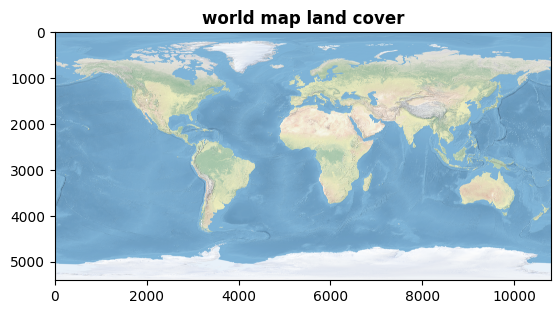

<Axes: title={'center': 'world map land cover'}>

In [32]:
#plotting the raster_image :
from rasterio.plot import show, show_hist
show(raster_mtx, title='world map land cover')

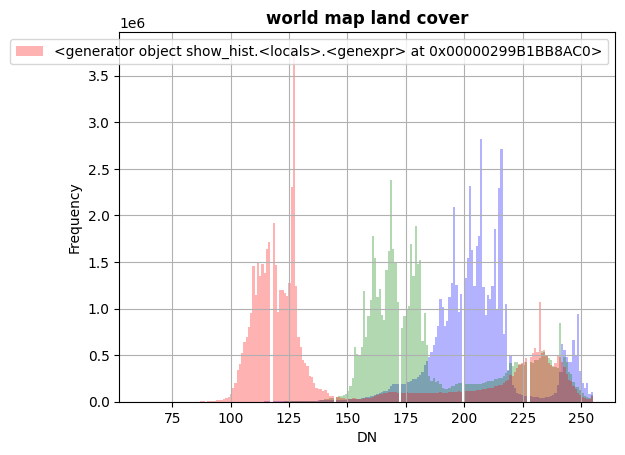

In [33]:
show_hist(raster_mtx, bins=200, alpha=0.3, histtype='stepfilled', title='world map land cover')

In [34]:
zonal_stats(link_shp, link_raster, categorical = True)

[{233: 1},
 {160: 1, 214: 1},
 {128: 1,
  136: 1,
  145: 1,
  146: 1,
  147: 1,
  148: 1,
  149: 3,
  150: 2,
  151: 4,
  152: 1,
  153: 1,
  154: 1,
  155: 1,
  156: 6,
  158: 1,
  159: 3,
  160: 3,
  161: 6,
  162: 4,
  163: 2,
  164: 4,
  166: 8,
  167: 3,
  168: 4,
  169: 9,
  170: 4,
  171: 3,
  172: 5,
  173: 5,
  174: 1,
  175: 4,
  176: 8,
  177: 7,
  178: 14,
  179: 5,
  180: 3,
  181: 8,
  182: 3,
  183: 6,
  184: 9,
  185: 12,
  186: 12,
  187: 10,
  188: 5,
  189: 12,
  190: 13,
  191: 8,
  192: 7,
  193: 7,
  194: 12,
  195: 11,
  196: 7,
  197: 9,
  198: 8,
  199: 7,
  200: 13,
  201: 9,
  202: 12,
  203: 10,
  204: 11,
  205: 13,
  206: 9,
  207: 12,
  208: 13,
  209: 12,
  210: 11,
  211: 12,
  212: 12,
  213: 21,
  214: 17,
  215: 16,
  216: 15,
  217: 17,
  218: 16,
  219: 21,
  220: 20,
  221: 15,
  222: 29,
  223: 14,
  224: 22,
  225: 30,
  226: 21,
  227: 27,
  228: 36,
  229: 32,
  230: 38,
  231: 34,
  232: 41,
  233: 36,
  234: 49,
  235: 49,
  236: 69,
  237: 

In [35]:
import rasterio.mask

with fiona.open(link_shp, 'r')as shapefile:
    for feature in shapefile :
        shapes = [feature['geometry']]

with rasterio.open(link_raster) as src:
    # Appliquer le masque
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta.copy()

    # Mettre à jour les métadonnées
    out_meta.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
        "count": src.count,
        "dtype": out_image.dtype
    })

# Écrire le raster masqué dans un fichier
with rasterio.open(r"data\output raster\out_marocco_regions.tif", "w", **out_meta) as dest:
    for i in range(out_image.shape[0]):
        dest.write(out_image[i], i + 1)

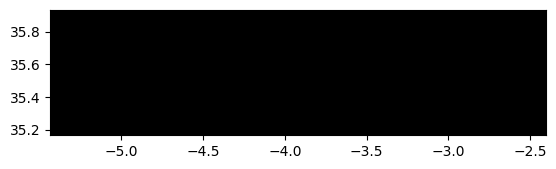

<Axes: >

In [36]:
from rasterio.plot import show
show(rasterio.open("data\output raster\out_marocco_regions.tif"))

#### Let's create an inverted version of the mask :

In [37]:
# Lire le shapefile
with fiona.open(link_shp, 'r') as shapefile:
    shapes = [feature['geometry'] for feature in shapefile]

# Lire le raster
with rasterio.open(link_raster) as src:
    # Lire les données du raster
    image = src.read()  # Lire toutes les bandes
    image_meta = src.meta.copy()
    
    # Appliquer le masque
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    
    # Créer une version inversée du masque
    mask = np.ones(out_image.shape, dtype=bool)
    if src.nodata is not None:
        mask[out_image != src.nodata] = False  # Marquer les zones définies par le shapefile comme False
    
    # Appliquer le masque inversé au raster
    inverted_image = np.where(mask, out_image, src.nodata)

    # Préparer les métadonnées pour le nouveau raster
    out_meta = image_meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": inverted_image.shape[1],
        "width": inverted_image.shape[2],
        "transform": out_transform,
        "count": inverted_image.shape[0]  # Nombre de bandes
    })

# Écrire le raster inversé dans un fichier
with rasterio.open(r"data\output raster\our_morroco_regions_inverted.tif", "w", **out_meta) as dest:
    for i in range(inverted_image.shape[0]):
        dest.write(inverted_image[i], i + 1)

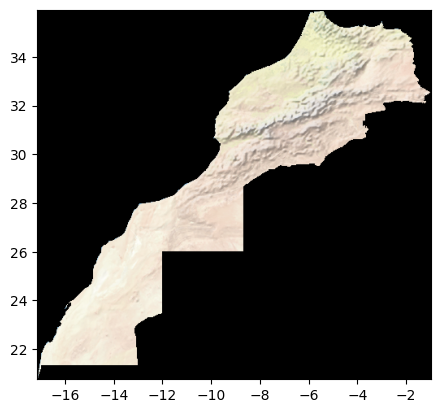

<Axes: >

In [38]:
show(rasterio.open("data\output raster\our_morroco_regions_inverted.tif"))